<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-06-16 06:05:30--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.53MB/s    in 0.9s    

2023-06-16 06:05:32 (5.53 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import nltk
import textwrap
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopw = set(stopwords.words('english'))

In [5]:
df = pd.read_csv('bbc_text_cls.csv')
df.sample(5)

,text,labels
355,S Korea spending boost to economy\n\nSouth Kor...,business
1237,Brown outlines third term vision\n\nGordon Bro...,politics
131,Brazil buy boosts Belgium's Inbev\n\nBelgian b...,business
41,UK Coal plunges into deeper loss\n\nShares in ...,business
1405,Costin aims for comeback in 2006\n\nJamie Cost...,sport


In [6]:
stopw = stopw.union({ 'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year'})
stopw = list(stopw)

In [7]:
counter = CountVectorizer(stop_words=stopw)

In [8]:
x = counter.fit_transform(df.text)

In [9]:
lda = LatentDirichletAllocation(n_components = 10, random_state=81828)

In [10]:
lda.fit(x)

LatentDirichletAllocation(random_state=81828)

In [24]:
def get_topic_words(feature_names, model, top_words = 10):
  figure, axes = plt.subplots(2,5, figsize=(30,15), sharex=True)            # making the subplot and setting number of rows for whole subplot to 2 and columns 5
                   # sharex is to share the x axis among multiple column graphs
  axes = axes.flatten()
  for topic_id, topic in enumerate(model.components_):
    topic_word_idx = topic.argsort()[:-top_words-1:-1]
    words = [feature_names[i] for i in topic_word_idx]
    weight_probs = topic[topic_word_idx]

    ax = axes[topic_id]
    ax.barh(words, weight_probs, height=0.7)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=30)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    figure.suptitle('LDA results', fontsize=50)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

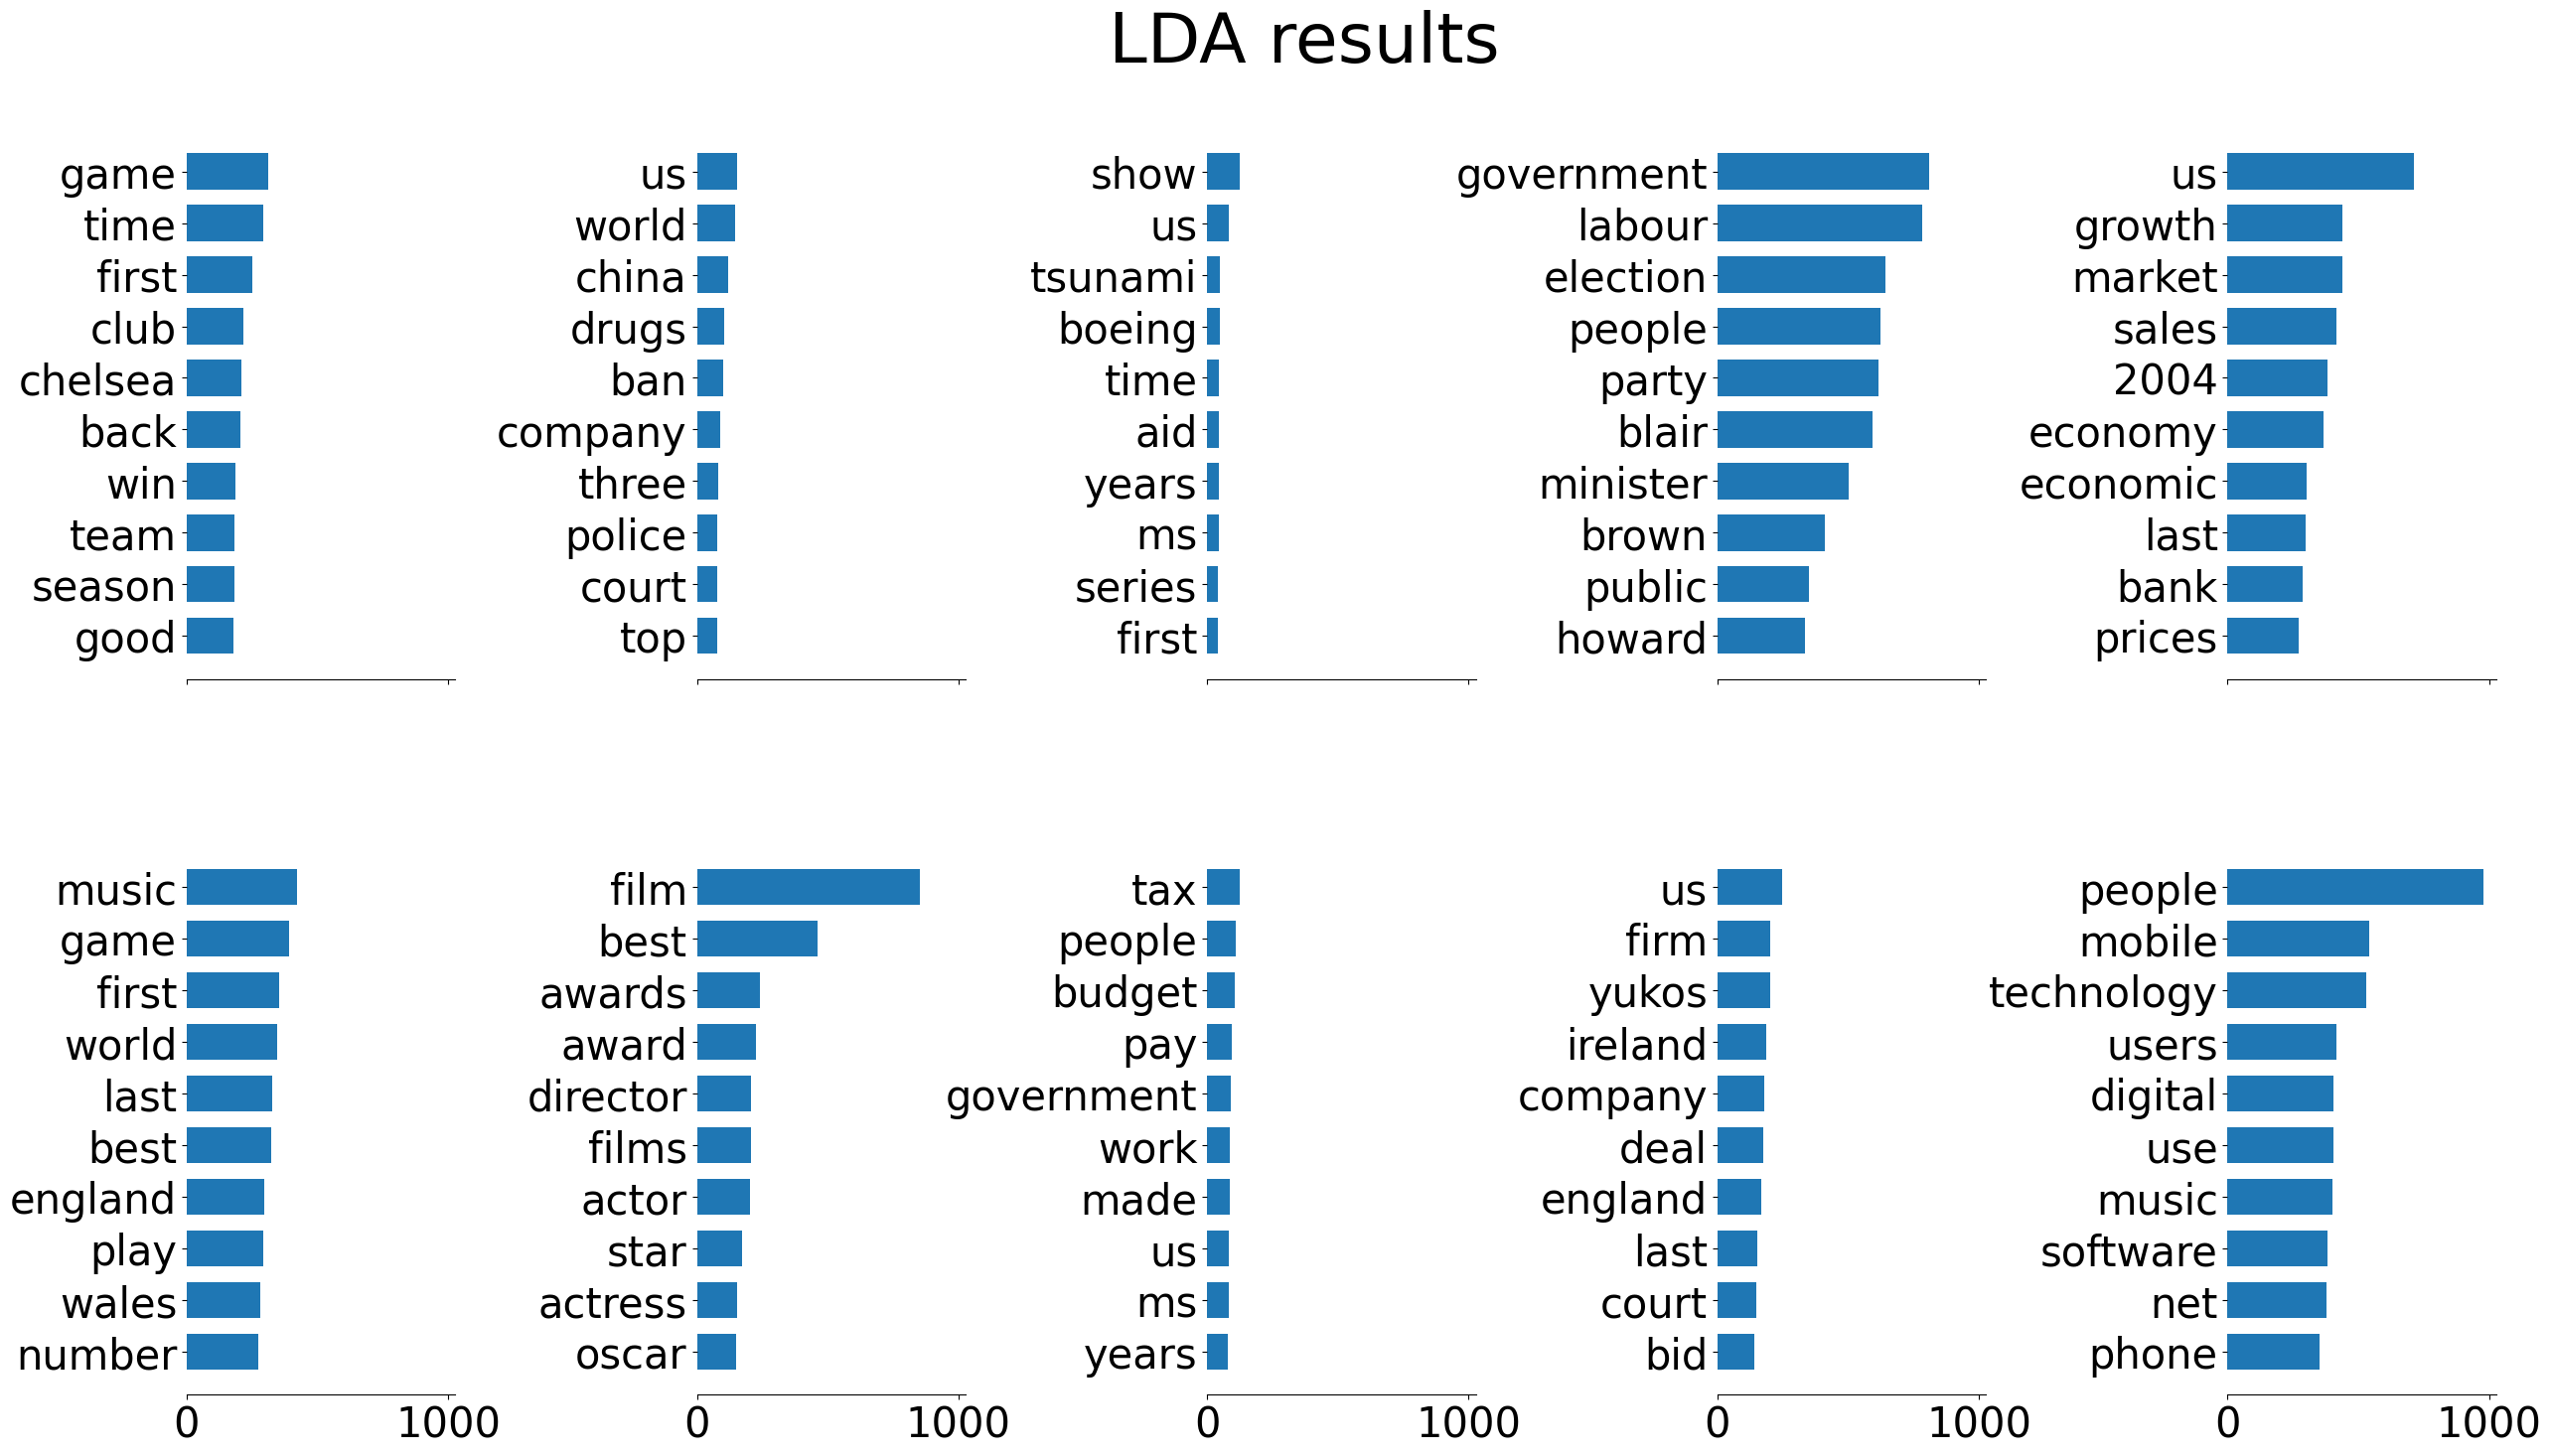

In [25]:
features = counter.get_feature_names_out()
get_topic_words(features, lda)

In [26]:
z = lda.transform(x)

Text(0.5, 0, 'entertainment')

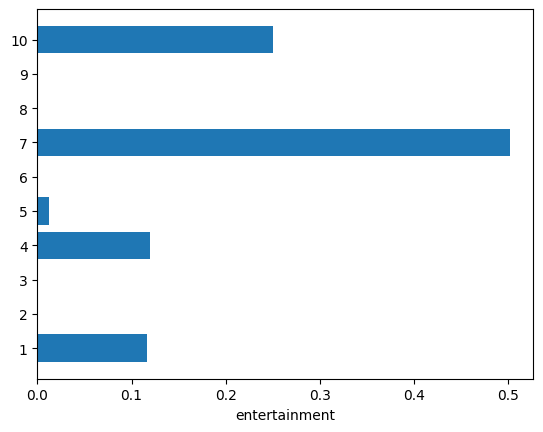

In [30]:
# np.random.seed(0) if user wants same results again and again
i = np.random.choice(len(df))
topic = z[i]
topics = np.arange(10)+1

fig, ax = plt.subplots()
ax.barh(topics, topic)
ax.set_yticks(topics)
ax.set_xlabel(df.iloc[i].labels)

as we can see this entertainment label is related to the oscars article below

In [33]:
def wrap(text):
  return textwrap.fill(text, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i].text))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20